In [38]:
from matplotlib import pyplot as plt   #plotting 할 때 쓰는 라이브러리
from mpl_toolkits.mplot3d import Axes3D  
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [85]:
# parameter setting
amp = 2          # range [0.0, 1.0]   amplitude가 1이란 것은 1에서 -1까지만 진폭을 정해놓은 것.
sr = 10000       # sampling rate, Hz   소리의 해상도, 화질. 1초를 몇개의 값으로 표현하느냐 
dur = 0.5        # in seconds   몇 초동안 소리가 나느냐
freq = 100.0     # sine frequency, Hz   1초 동안 몇 번 왔다갔다 하느냐

In [35]:
theta = np.arange(0, 2*np.pi)  #0부터 2파이까지 각도의 범위 만드는 법 ( 여기서는 파이가 3.14로 계산 되고 arange는 default로 1만큼 띄어서 범위 만들기 때문에 아래처럼 된 것.)
theta  #여기서는 t를 정의하지 않고 사인웨이브를 만들어 볼 것임.

array([0., 1., 2., 3., 4., 5., 6.])

In [36]:
s = np.sin(theta)
s

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ])

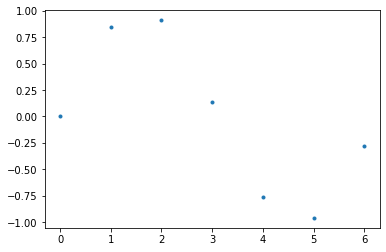

In [39]:
fig = plt.figure()  #figure은 아래 전체를 말함.
ax = fig.add_subplot(111)  
ax.plot(theta, s, '.')

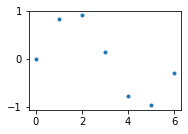

In [45]:
fig = plt.figure()  
ax = fig.add_subplot(221)  
ax.plot(theta, s, '.')

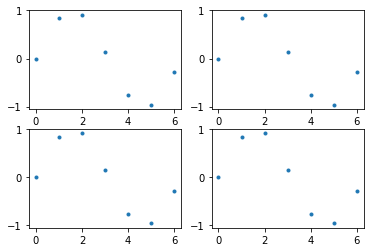

In [14]:
fig = plt.figure()  #아래 전체가 figure
ax = fig.add_subplot(221)  #subplot은 여러개의 화면 분리를 해서 subplot 만든 다는 것. 221의 뜻은 화면을 (2,2)로 분리 한다는 것. 즉 행 2개, 열 2개로 화면 분리 한다는 것. 그리고 그 중에서 1번째 것으로 선택한다는 것.
ax.plot(theta, s, '.')
ax = fig.add_subplot(222)  #이것은 화면분리의 2번째 것으로 오른쪽 위 그림임. 3번째 그림은 왼쪽 아래, 4번째 그림은 오른쪽 아래.
ax.plot(theta, s, '.')     #이것은 theta(각도값)을 x축으로 하고 s(theta를 사인함수에 넣어 나온 output)을 y축으로 한다는 것.
ax = fig.add_subplot(223)  #아래의 문제는 너무 sparse하다는 것. 빽빽하게 만들 필요 있음.
ax.plot(theta, s, '.')
ax = fig.add_subplot(224)
ax.plot(theta, s, '.')

In [46]:
theta = np.arange(0, 2*np.pi, 0.1)
theta

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2])

In [47]:
s = np.sin(theta)
s

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ])

Text(0, 0.5, 'value')

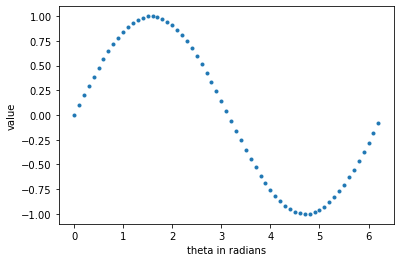

In [51]:
fig = plt.figure()  
ax = fig.add_subplot(111)  
ax.plot(theta, s, '.') 
ax.set_xlabel('theta in radians')  #여기서 x축은 equidistant함. 그런데 y축은 그러지 않음. x축에서 equidistant하는데 y축에서도 equidistant하다는 것은 linear 하다는 것. 즉 직선(line)이라는 것. 아래와 같이 line이 아닌 것은 non-linear이라고 함. y = ax + b의 형태만 linear하다. 나머지는 모두 non-linear. 
ax.set_ylabel('value')   #이렇게 만든 그래프는 시간의 개념이 없기 때문에 소리로 만들 수 없음.

In [ ]:
t 0.001 0.002 0.003  #타임을 먼저 만들어야 한다. 왼쪽과 같은 방식으로 쭉 가면 sampling rate은? 1000.

In [ ]:
t 0.0001 0.0002 0.0003 ... 0.5000  #이렇게 하면 sampling rate이 10000. 여기서는 sampling rate이랑 duration을 둘다 표현한 것. duration은 0.5. amplitude이랑 frequency는 포함 안됨. 이렇게 sampling rate과 duration만 있으면 time을 만들어 낼 수 있다.

In [ ]:
t = np.arange(1, sr)  #1에서 9999까지 array 만든 것.

In [ ]:
t = np.arange(1, sr+1)  #만개의 array 만든 것. 이렇게 하면 samplng rate은 맞지만 이것은 1초를 전부 다 채웠을 때의 경우임. 하지만 duration은 0.5초로 그에 맞게 5000개만 만들어야함. 즉 0.5초만 적용해야 하므로 아래 처럼 duration 곱함.

In [ ]:
t = np.arange(1, sr*dur+1)  #0.5초까지 총 5000개의 time tick을 만들어냄. 그러나 time tick의 5000개 index를 만들어낸 것뿐이지 실제 time은 아님.

In [ ]:
t = np.arange(1, sr*dur+1)/sr #sr로 나눠서 진짜 시간의 개념을 적용. 1/10000초부터 5000/10000초까지 만든 것. 

In [86]:
# generate time
t = np.arange(1, sr * dur+1)/sr

In [5]:
t  #아래는 숫자 표현법. 1.000은 1 나타낸 것. e-04 뜻은 1/(10의 4제곱) 즉 1/10000. 따라서 1.000e-04는 1 곱하기 1/(10의 4제곱).e-01은 1/10

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

In [87]:
# generate phase    time만 있다고 소리를 만들 수 있는 것이 아님. 세타에 들어가는 각도값을 phase라고 함. phase를 만들어야함. time과 연동시켜서 phase를 만들어야함.
theta = t * 2*np.pi * freq   #np.pi는 그냥 파이임. 상수값. 파이를 계산가능하게 한 것. t 곱하기 2파이를 한 것은 phasor가 한 바퀴 돌게 한 것임. 1초가 될 때 t값은 1인데 그 때 2파이를 곱하면 그 값은 2파이임. 즉 0부터 2파이까지를 만든 것. 2파이는 한 바퀴를 도는 것. 근데 거기에 frequency를 곱함으로써 1초에 몇바퀴를 도는지가 결정됨. 2파이가 1초동안 총 몇개가 있는지를 결정하는 것. -> time 개념과 phase(각도값)개념이 동시에 들어가 있는 것. 여기서 time의 벡터의 사이즈(5000개)와 theta의 벡터의 사이즈(5000개)는 같다.

In [88]:
# generate signal by cosine-phasor
s = np.sin(theta)  #위 세타를 사인에 넣은 것. -> 그에 해당하는 사인함수 만들어질 것.

<IPython.core.display.Javascript object>


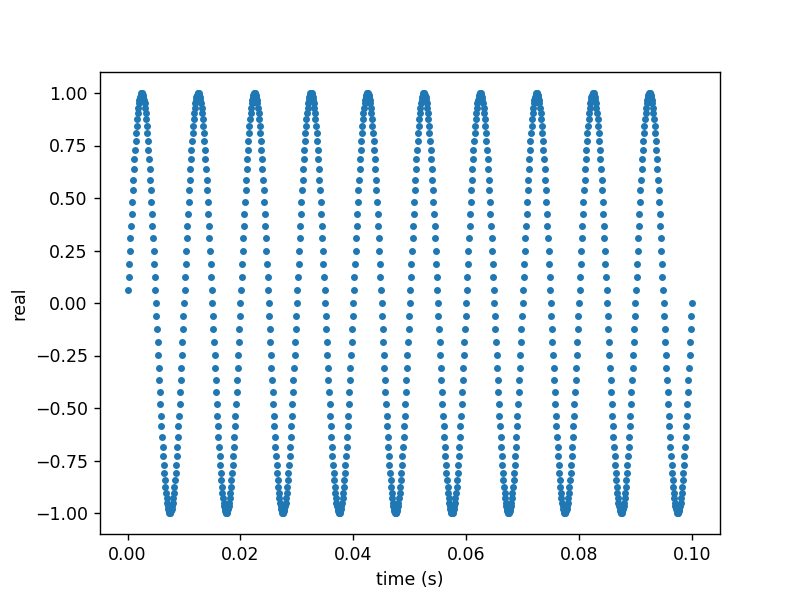

Text(0, 0.5, 'real')

In [89]:
fig = plt.figure()  #plotting
ax = fig.add_subplot(111)  # plt.figure()로 fig를 정의하고 그 fig에 있는 함수를 사용해 그림을 만들준비를 하는 것.
ax.plot(t[0:1000], s[0:1000], '.')  #아래 그림처럼 plot을 하는 함수. 두개의 입력값: x 와y. 저기서 t가 x를 받고 s가 y를 받음. 이때 x에 들어가는 것의 개수와 y에 들어가는 것에 개수는 같아야함. 다르면 에러남. 점의 개수는 총 1000개. t대신 theta넣어도 됨. 그런데 theta는 넣을 필요가 없음 왜냐하면 어차피 한바퀴 왔다갔다한 것의 theta값은 무조건 2파이이기 때문에 너무 뻔함. time넣고 그림을 봐도 한 바퀴 왔다갔으면 theta는 그때 2파이라는 것을 알 수 있음.'.'은 점으로 plotting하라는 것. 
ax.set_xlabel('time (s)')  #t에서 1000번째까지만 하기로 했으므로 아래 그림에서 0.1초까지만 나옴.
ax.set_ylabel('real')   #아래 곡선은 사인 곡선. s에 사인을 썼으므로.

In [90]:
# generate signal by complex-phasor
c = np.exp(theta*1j)  #exp는 exponential임 즉 e임. np.exp는 하나의 큰 e임. 즉 숫자. 저기서 함수 괄호 안에 들어가 있는 것은 e의 제곱으로 있는 것임. 1j는 i와 같음. i와 j를 같이 쓰는 것처럼 i와 1j는 같은 것. 그래서 저기서 np.exp(theta*1j)는 e^θi와 같음. 이것은 오일러 phasor.e와 i는 정해진 상수이고 theta값만 변하는 것.
c  #아래의 값들은 전부 복소수 a + bi의 형태로 되어있음. 위에서 i를 썼기 때문. 아래 값들은 복소수 값 벡터들임.

array([0.99802673+6.27905195e-02j, 0.9921147 +1.25333234e-01j,
       0.98228725+1.87381315e-01j, ..., 0.9921147 -1.25333234e-01j,
       0.99802673-6.27905195e-02j, 1.        +1.96438672e-15j])

<IPython.core.display.Javascript object>


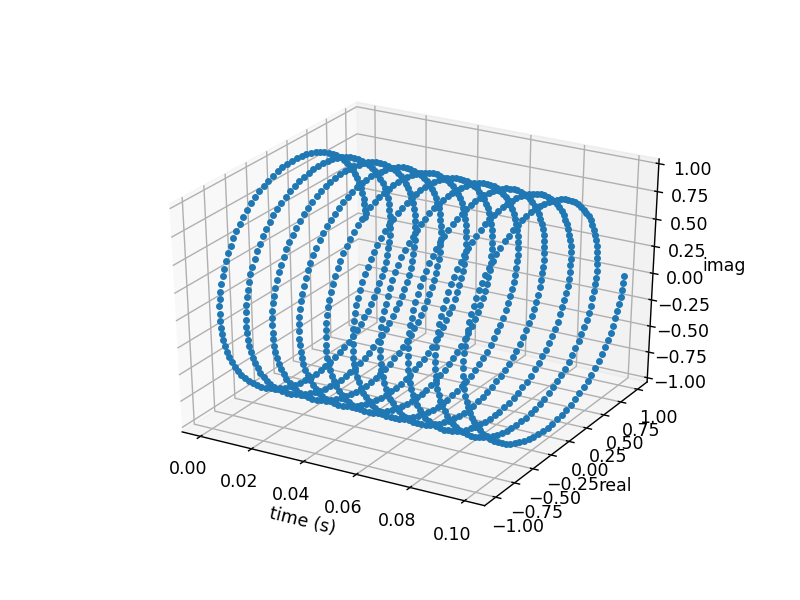

Text(0.5, 0, 'imag')

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')   #위 그림은 2d인데 이 그림은 3d로 만들게 하는 것.
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')  #위에서는 x,y 두개의 입력값만 필요로 했는데 여기서는 3개의 입력값을 필요로 함. 즉 위에서는 (a,b)의 형태인 벡터로 되어있는데 여기서는 (a,b,c)형태의 3차원의 벡터로 되어있음. 3개 입력값의 개수는 모두 동일해야 함. 점의 개수는 모두 1000개
ax.set_xlabel('time (s)')   # c.real은 c에서 실수부분만 가져옴. c.imag하면 c에서 허수부분만 가져옴.
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [107]:
ipd.Audio(s, rate=sr)  #소리를 만드는 함수. 두가지 입력값 필요. s 즉 소리의 최종값(s는 사인함수로 소리를 나타냄)과 sampling rate이 필요함. sampling rate이 없으면 소리의 실체가 없다.

In [141]:
ipd.Audio(c.imag, rate=sr)  #이렇게 해도 위와 같음. c.real 써도 같은 소리가 나오긴 함.

In [142]:
# !pip install sounddevice #라이브러리를 까는거임. 소리 만드는 것임.
import sounddevice as sd  
sd.play(c.real, sr)

In [92]:
s = amp*np.sin(theta)  # 진폭을 적용하는 것.

<IPython.core.display.Javascript object>


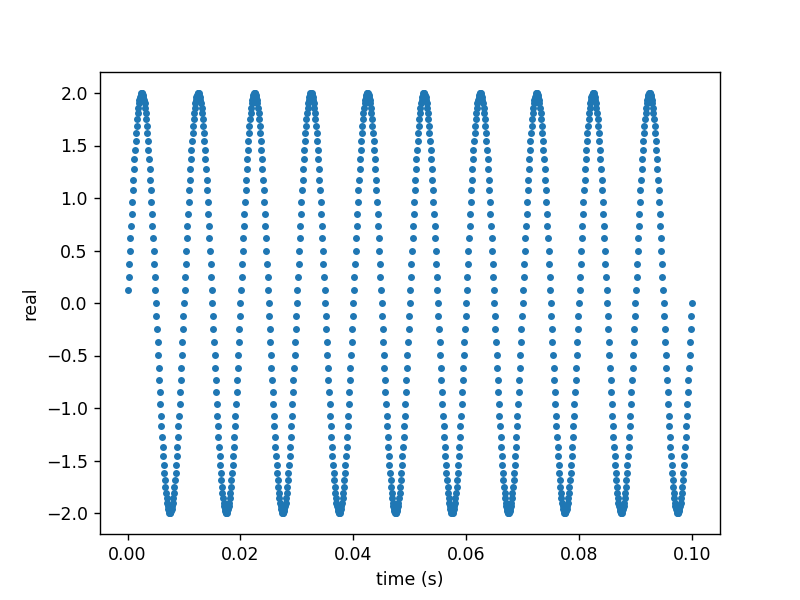

Text(0, 0.5, 'real')

In [93]:
fig = plt.figure()    #아래 보이는것과 같이 진폭이 2임.
ax = fig.add_subplot(111) 
ax.plot(t[0:1000], s[0:1000], '.') 
ax.set_xlabel('time (s)')  
ax.set_ylabel('real')

In [94]:
c = amp*np.exp(theta*1j)   #이것도 마찬가지로 진폭 적용 시키는 것. 이걸로 plotting 하면 amplitude에 따라서 진폭(원의 직경)이 바뀜. 이걸로 만든 complex phasor에서 time을 안 보이게 하고 원으로 봤을 때, 원의 반지름이 amplitude임.

<IPython.core.display.Javascript object>


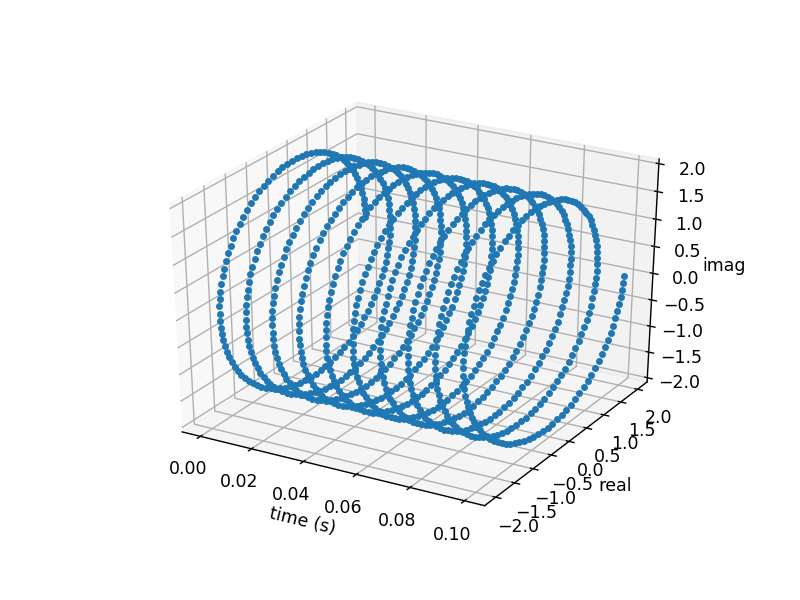

Text(0.5, 0, 'imag')

In [95]:
fig = plt.figure()   #아래 보이는것과 같이 진폭이 2. 원의 반지름이 2.
ax = fig.add_subplot(111, projection='3d')   
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')  
ax.set_xlabel('time (s)')   
ax.set_ylabel('real')
ax.set_zlabel('imag')

<IPython.core.display.Javascript object>


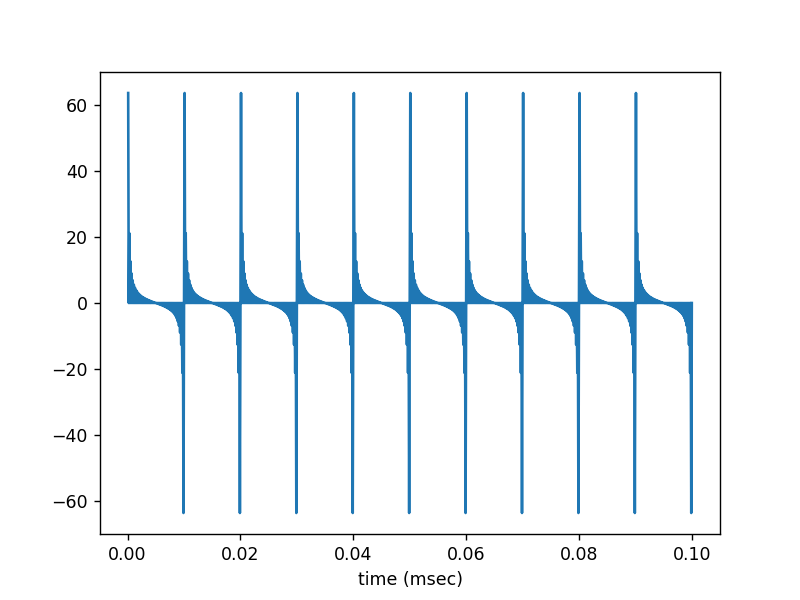

In [96]:
# generate samples, note conversion to float32 array  #source의 harmonics 만드는 것. 우선 F0을 설정해야 함. 이 아래 그림을 pulse train이라고 함.
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));  #Fend는 가장 마지막 frequency임. 이를 sampling rate의 절반(nyquist frequency)로 한 것. 마지막 frequency를 더 올려서 더 많이 표현하고 싶으면 sampling rate을 더 올려야함. (sr/2)는 nyquist frequency임.
for freq in range(F0, Fend+1, F0):  #F0부터 Fend까지 증가분이 F0 100부터 5000까지 가는 것. 그래서 50번 loop가 돎. 각 frequency에 대해서 사인함수를 만들어 harmonics를 만들려하는 것.
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp  #첫 s에 대한 정의를 해야함. 그것이 첫째 줄에 있는 것. 그래서 그 다음 s가 나오면 그건 그 다음 s에 들어가고, 그것이 반복됨. 그래서 계속 더하고 더하고 그렇게 계속 가면서 harmonics를 만드는것.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')  # 아래 음성파일을 다운받아 praat으로 보면 다 진하게만 나옴. 산맥 x.
ipd.Audio(s, rate=sr)   #여러 사인웨이브들이 합쳐진 소리이기 떄문에 pure한 소리는 아님. 여기서 만든 spectrum은 gradually decreasing 하지 않고 amplitude가 같다. 사람 목소리가 나게 하려면 gradually decreasing하게 만들어야하고 그리고 산맥도 만들어야함.

In [97]:
def hz2w(F, sr):   #이것은 function을 만드는 것.  F는 frequency이고 sr은 sampling rate
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w  #이 부분이 출력. return이 없으면 출력을 안 하는 것.

def resonance (srate, F, BW):  #srate은 sampling rate, F는 frequency, BW는 bandwidth.
    a2 = np.exp(-hz2w(BW,srate))  # 위 함수가 이 부분에서 쓰이는 것. 즉 우리는 resonance만 쓰는 것이고 hz2w는 따로 안 쓰고 내부적으로만 쓰임.
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [98]:
RG = 0  # RG is the frequency of the Glottal Resonator  0에서 산맥을 하나 만든다는 것은 0을 기준으로 좌우로 산맥을 만든다는 것. 그런데 마이너스쪽에서는 없어지므로 0이상인 부분만 남는데, 산맥이므로 grdaually decreasing하게 됨. 즉 0에서 산맥을 만드는 것은 gradually decreasing 하게 만드는 것.
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)  #sr은 sampling rate넣는다. RG에서는 산맥의 위치를 넣는다. 즉 spectrum에서 산맥이 나타나는 frequency의 위치. BWG에서는 산맥의 뚱뚱한 정도를 넣으면 됨. 즉 산맥의 shape를 결정함. 100정도면 꽤 뚱뚱한 거고 60이면 작은거고 200이면 훨씬 뚱뚱한 것.
s = lfilter(b, a, s, axis=0)  #resonance함수 사용해서 a, b 구한 것을 여기서 lfilter에 넣음 그리고 s는 위에서 가져옴. 그리고 이 함수 결과가 다시 s로 돼서 아래의 s에 대입됨. 그리고 그 s는 또 다시 그 아래 함수의 s에 대입. 그렇게 산맥 만들어나가는 것.
ipd.Audio(s, rate=sr)  #이걸 praat으로 보면 spectrogram이 아래쪽은 짙고 위쪽으로 갈 수록 흐려짐.

In [99]:
RG = 500  # RG is the frequency of the Glottal Resonator  500hz에다가 산맥을 하나 만드는 것. Formant를 만드는 것. F1을 만드는 것임.
BWG = 60  # BWG is the bandwidth of the Glottal Resonator  60이니까 조금 홀쭉한 산맥임.
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)  #gradually decreasing 돼서 훨씬 부드러운 소리가 나옴.

In [100]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [101]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [102]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)  # 이 소리를 다운 받고 praat으로 열면 spectrogram에서 부드럽게 산맥이 형성된 모습이 보임. spectrum에서도 보임.

In [103]:
s = lfilter(np.array([1, -1]), np.array([1]), s)  #입술의 효과를 주는 것. 나팔을 생각하면 됨. 소리가 공명되어 더 크게 퍼져 나감.
ipd.Audio(s, rate=sr)  #위에서 만든 소리는 입의 중간 위치에서 나는 소리임.

In [63]:
amp = 1
sr = 10000
dur = 0.5
freq = 440.0  #440hz는 라(A). 880으로 해도 동일. 1760해도 동일. 220, 110해도 라.즉, 옥타브를 띌려면 배수를 하면 됨.

In [64]:
t = np.arange(1, sr*dur+1)/sr

In [65]:
theta = t * 2*np.pi * freq

In [66]:
s = amp * np.sin(theta)

In [67]:
s = amp * np.cos(theta)  #사인이든 코사인이든 소리가 변하지는 않는다. 웨이브의 시작점이 달라지는 것뿐. 코사인과 사인은 파이/2 만큼을 움직이는 것만큼의 차이가 있음. shape는 동일. shape가 동일하면 그 그래프를 얼마만큼 이동하든지 우리 귀는 인식못함. 그 각도를 phase라고 하는데 우리는 phase를 인식하고 느끼지 못한다. 우리는 frequency를 느끼는 것.

<IPython.core.display.Javascript object>


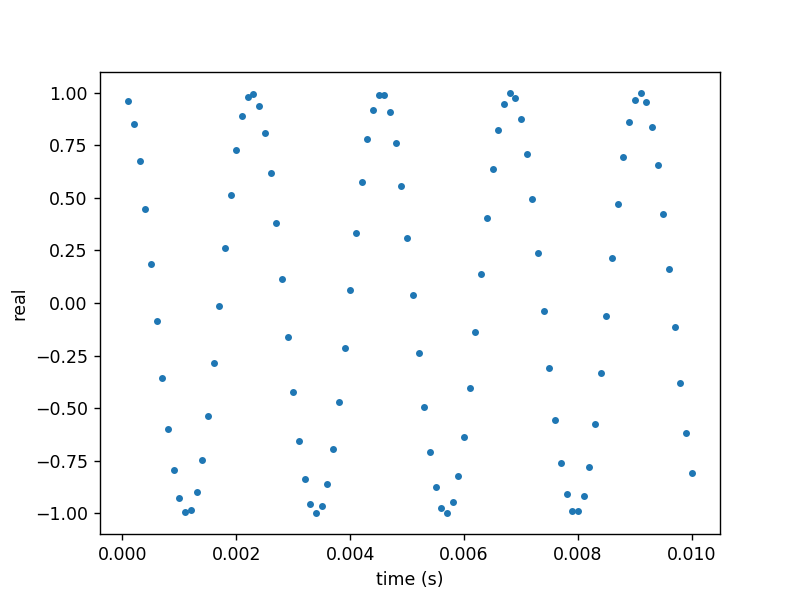

Text(0, 0.5, 'real')

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:100], s[0:100], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [70]:
ipd.Audio(s, rate=sr) #여기서는 frequency가 440hz이기 때문에 라(A)소리가 남.

In [71]:
c = amp*np.exp(theta*1j)  #complex number 자체는 plotting 할 수 없다. a + bi는 plotting 못함. a, b를 각각 plotting 하는 것. a, b를 2차원으로 plotting 하는 것. 위의 사인 웨이브 같은 것들은 1차원에서 찍음.

<IPython.core.display.Javascript object>


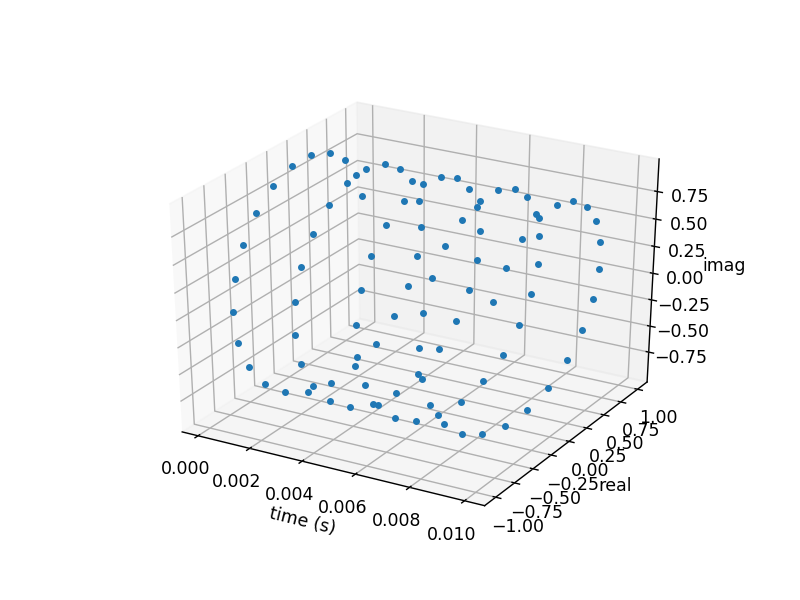

Text(0.5, 0, 'imag')

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:100], c.real[0:100], c.imag[0:100], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [73]:
ipd.Audio(c.imag, rate=sr)

In [104]:
from scipy.io import wavfile  
# sr, s = wavfile.read('a.wav')    #위 함수 import하고 저렇게 외부에서 wave파일을 불러오면 그것으로 쓸 수 있다. 그런데 우리는 이렇게 하지는 않고 위에서 만든 s로 할 것임.
nSamp = len(s)   #s wave를 분석해 그 frequency 성분을 알아내기 위해서는 s 벡터의 길이가 얼마나 되는지 알아야 그 개수에 맞게 complex phasor의 개수를 맞추어 inner product를 할 수 있다. 그래서 sample의 개수가 중요.
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

In [105]:
nFFT = nSamp  #이름만 바꿈.
amp = [];
for n in range(0,nFFT):  #sample개수만큼 for loop를 돎.
    omega = 2*np.pi*n/nFFT # angular velocity
    z = np.exp(omega*1j)**(np.arange(0,nSamp))  #complex wave를 만드는 줄.  **뜻은 제곱으로 올리는 것. 뒷부분이 앞부분의 제곱으로 올라감. wi는 이미 지수로 올라갔으므로, 지수를 곱해주면 되는 것. 이때, 이 지수를 잘 정리하면, n[0...2파이]i 이런 형식으로 만들 수 있음. 그래서 대괄호 안이 세타 한바퀴 도는 것임. n에 1들어가면 한바퀴 돌고, n에 2들어가면 두바퀴 돎. 한바퀴 돌때나 두바퀴 돌때나 모두 5000개의 샘플로 나타냄(샘플의 개수를 5000개). 그래서 총 5000바퀴까지 감. 이 5000개 각각의 complex phasor을 모두 s와 dot product하는 것. complex phasor이 한 바퀴 돌면 2hz가 되어 그것을 s와 dot product 하는 것, 두바퀴 돌면 4hz의 frequency에 해당하여 그것을 s와 dot product하는 것 이렇게 생각하면 됨. 이때, 이것은 2500번째 loop까지만 유효함. 왜냐면 5000개의 샘플로 표현할 수 있는 최대가 2500바퀴이기 때문. 그 이상부터는 아래처럼 대칭돼서 나옴.
    amp.append(np.abs(np.dot(s,z)))  #s와 z를 dot product. abs는 절댓값임. dot product를 해서 complex number이 나와도 절댓값으로 계산가능. 그리고 계산 할 때마다 그 값을 amp라는 빈 variable에 append하는 것. for loop이 끝나고 나서 len(amp)는? loop를 하는 횟수. amp에는 허수가 들어가지 않음. 절댓값을 취했기 때문. 이제 amp를 plotting 하면 끝.

<IPython.core.display.Javascript object>


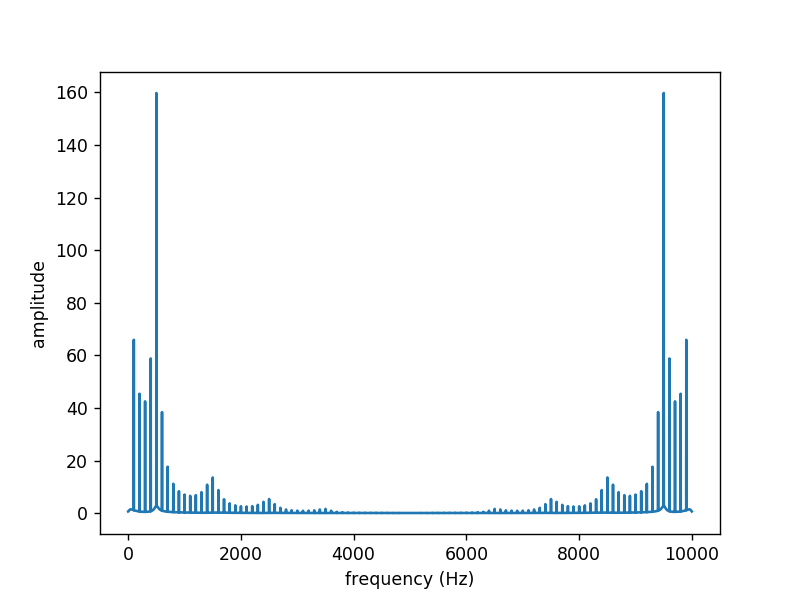

Text(0, 0.5, 'amplitude')

In [106]:
fig = plt.figure()   #여기에 있는 바의 개수와 샘플의 개수와 같다. 여기서 frequency의 반까지만 의미가 있음. nyquist frequency임. 좌우는 대칭 돼 있음.
ax = fig.add_subplot(111)  #여기서 앞부분에서 grdaually decreasing, 500hz에 산맥, 1500hz에 산맥, 2500hz에 산맥 등등 만든 것이 그대로 나타남. 각각의 formant가 그대로 나타나는 것.
freq = np.arange(1,nFFT+1)*sr/nFFT;  # 이것을 정리하면 [sr/샘플의 개수 .... sr]->[2 ... 10000] 이렇게 됨. 이것을 x축으로 함.
ax.plot(freq, amp) #x값- freq. y값- amp   #아래에서 한 bar에 해당하는 값이 inner product의 값임.
ax.set_xlabel('frequency (Hz)')  
ax.set_ylabel('amplitude')   #왼쪽과 오른쪽이 대칭임. 이는 5000까지만 nyquist frequency로 표현가능하기 때문. 5000이상부터는 frequency표현 안 되는 것이다. 그 이하에 있는 것만이 진짜 spectrum.

In [108]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

In [109]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec   # 0.008초의 웨이브를 쪼개서 이만큼의 벡터들을 가지고 dot product 시킴. 그래서 그걸로 spectrum을 만듦.
win_step = 0.001  # sec   #0.008초의 웨이브를 쪼개는데, 그것을 한 번 쪼개고 0.001초 이동해서 다시 쪼개고 0.001초 이동해서 다시 쪼개고 그러는 것. 그래서 같은 부분이 중복되게 됨. 이것을 이어붙여서 spectrogram이 됨.
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

frames: (492, 80)


<IPython.core.display.Javascript object>


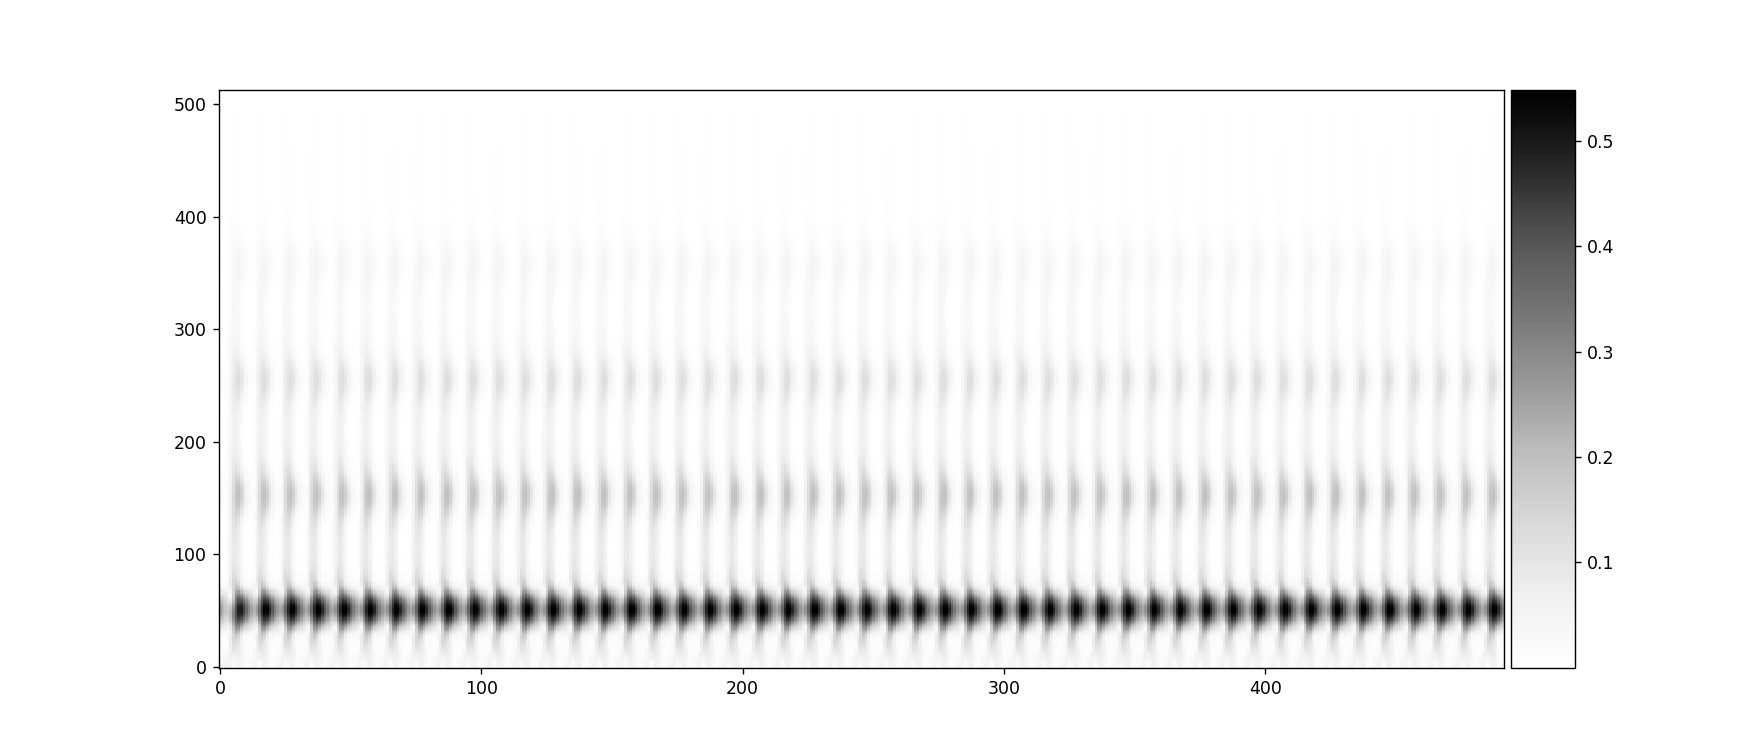

(<Figure size 1400x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f8abba5c50>)

In [110]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec)  #지금 이 상태는 너무 희미함. 그래서 한번더 처리를 가해야함. dot product해서 절댓값 취한 결과가 1보다 크면 진하고 1보다 작으면 연함.

<IPython.core.display.Javascript object>


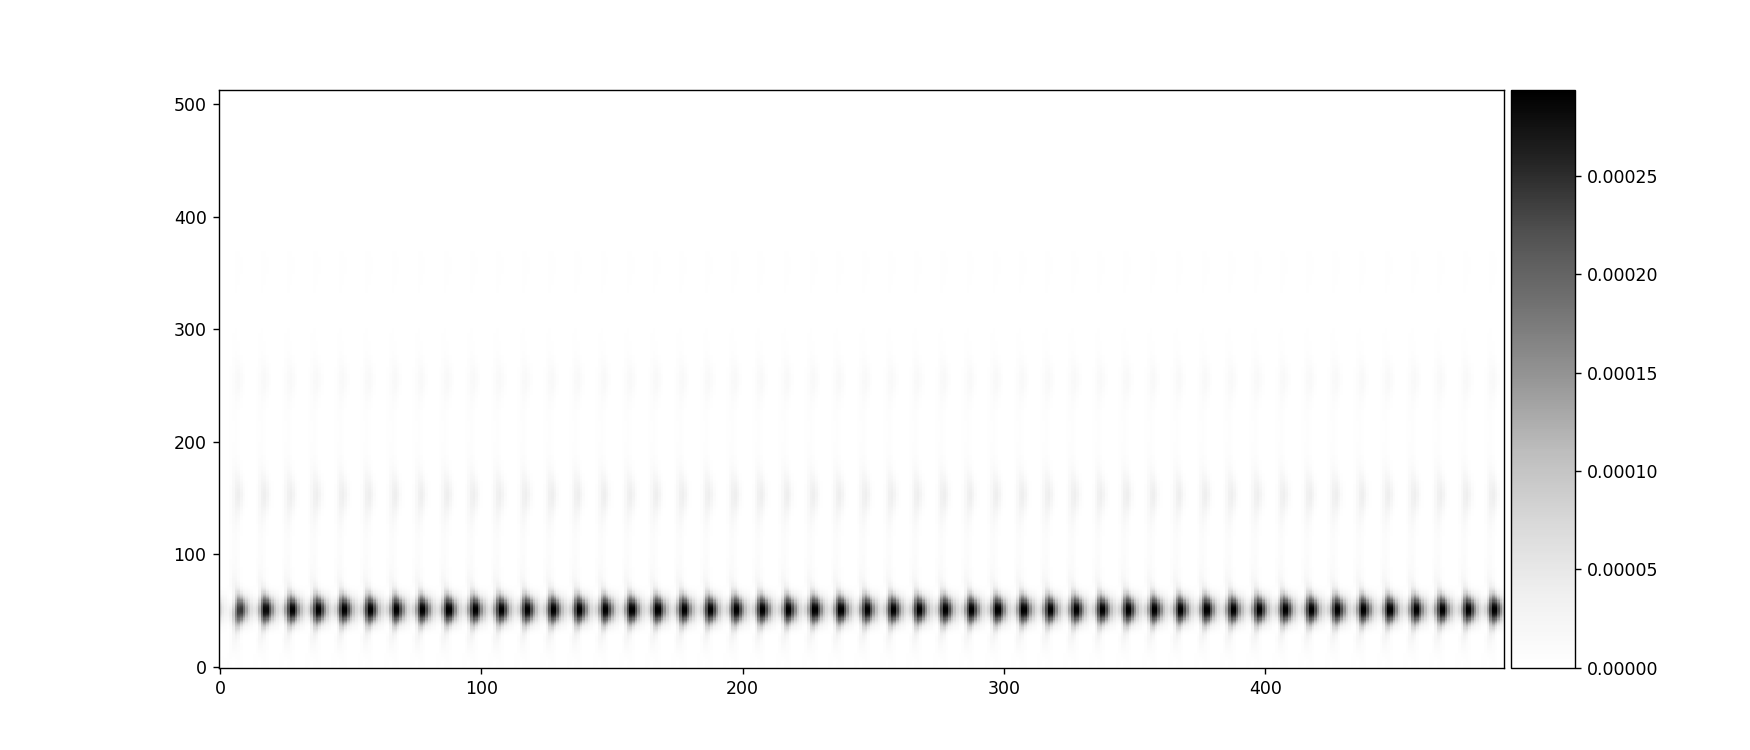

In [111]:
powspec = 1/nfft * (magspec**2)  #제곱을 해서 1보다 큰 값은 더욱 크게, 작은 값은 더욱 작게 함. 이렇게 하는 이유는 로그를 취하기 위함. 로그를 취하는 이유는 아무리 작거나 커도 로그를 취하면 일정한 간격으로 만들 수 있음. 너무 크거나 너무 작은 수들을 우리가 다룰 수 있는 범위 내로 바꿈.
plot_spectrogram(powspec);   #이걸 power spectrum이라고 말함.

<IPython.core.display.Javascript object>


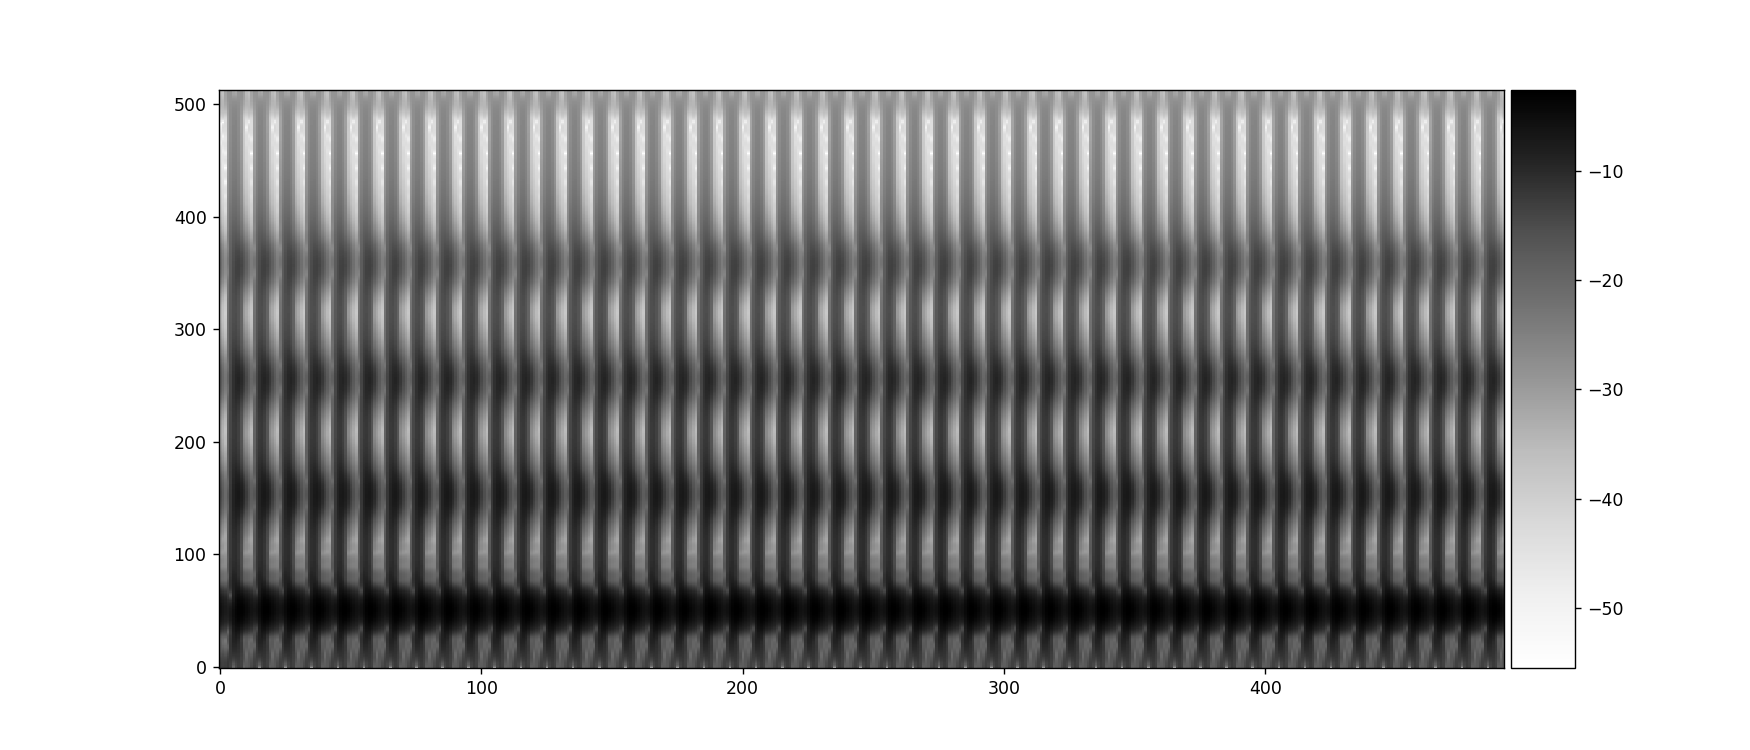

In [112]:
logspec = 10 * np.log10(magspec) # dB scale  #로그를 취하면 그 값이 나올텐데, 이는 쉽게 다룰 수 있는 값들임. -4~4 이 정도. 여기서 대충 10 정도 더하면 이렇게 적당히 진하게 골고루 나옴.
plot_spectrogram(logspec);